# Emergency Analysis

Data dibawah merupakan data _emergency call_ dari Montgomery County, PA.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
emergency = pd.read_csv('911.csv')
emergency.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Penjelasan dari kolom (feature) di atas ialah :
* `lat` dan `lng` merupakan garis horizontal dan lintang yang menunjukkan titik lokasi dari _emergency call_ dibuat.
* `zip` adalah kode pos dari lokasi _emergency call_.
* `title` ialah jenis _emergency call_ beserta dengan informasi detailnya.
* `timeStamp` adalah waktu saat panggilan tersebut diposting.
* `twp` merupakan kota atau kabupaten dari _emergency call_.
* `addr` adalah alamat spesifik dari panggilan tersebut.

In [3]:
emergency.shape

(663522, 9)

Dataset terdiri dari 663522 baris dan 9 kolom.

In [4]:
emergency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Beberapa info yang kita dapatkan di antaranya :
* Dataset secara general didominasi oleh tipe data `object`.
* Selain itu, jenis tipe data lainnya ialah `float64` dan `int64`.
* Kolom `timeStamp` harus dikonversi menjadi tipe data `datetime64`.
* `zip` dan `twp` memiliki beberapa baris dengan _missing values_.

## Data Cleansing and Manipulation

In [5]:
# Check for missing values
null_col = emergency.columns[emergency.isnull().any()]

null_emergency = emergency[null_col].isnull().sum().rename('missing_rows').to_frame()
null_emergency['percentage'] = round((null_emergency['missing_rows']/emergency.shape[0])*100, 3)

null_emergency.sort_values('missing_rows', ascending=False).style.background_gradient('Blues')

,missing_rows,percentage
zip,80199,12.087000
twp,293,0.044000


* Hanya `zip` dan `twp` yang memiliki _missing values_.
* Baris dengan _missing values_ dari kolom `twp` bisa kita buang dari dataset.
* Sementara kolom `zip` bisa kita buang dari dataset karena tidak akan kita gunakan dalam proses analisis.

In [6]:
# Drop column zip from dataset
emergency.drop('zip', axis=1, inplace=True)

In [7]:
# Drop row with missing values
emergency.dropna(axis=0, inplace=True)
emergency.reset_index(drop=True, inplace=True)

In [8]:
# Convert dtype of timeStamp
emergency['timeStamp'] = emergency['timeStamp'].astype('datetime64')

Pada tahap selanjutnya, kita akan melakukan manipulasi data terhadap kolom `title`.

Dari kolom `title` kita dapat memunculkan dua kolom baru yaitu jenis panggilan secara umum seperti `EMS`, `Fire`, dan `Traffic`. Satu kolom lagi yaitu detail dari jenis panggilan tersebut. Contohnya untuk `EMS` secara spesifik ialah `BACK PAINS/INJURY`, `DIZZINESS`, dan lain-lain.

In [9]:
# Split every row in title column with sep=': '
split_title = emergency['title'].str.split(': ', n=1, expand=True)

# New column general_title and detail_title from title
emergency['general_title'] = split_title[0]
emergency['detail_title'] = split_title[1]

# Drop column title
emergency.drop('title', axis=1, inplace=True)

Berhubung karena data selama tahun 2015 dan 2020 tidak begitu lengkap, maka kita hanya memilih data dari tahun 2016 hingga 2019.

In [10]:
# Slicing date from 2016-01 to 2019-12
condition = (emergency['timeStamp'] >= '2016-01') & (emergency['timeStamp'] < '2020')

# New dataframe from slicing row
emergency = emergency[condition].reset_index(drop=True)

In [11]:
emergency.head()

,lat,lng,desc,timeStamp,twp,addr,e,general_title,detail_title
0,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,ASSAULT VICTIM
1,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,FALL VICTIM
2,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,ABDOMINAL PAINS
3,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,ALTERED MENTAL STATUS
4,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,DIABETIC EMERGENCY


## Exploratory Data Analysis

### General Insight

In [12]:
emergency.describe(include='all')

,lat,lng,desc,timeStamp,twp,addr,e,general_title,detail_title
count,583103.000000,583103.000000,583103,583103,583103,583103,583103.0,583103,583103
unique,NaN,NaN,582901,563319,68,39739,NaN,3,94
top,NaN,NaN,CITY AVE & CARDINAL AVE; LOWER MERION; Statio...,2018-10-06 19:26:38,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN,EMS,VEHICLE ACCIDENT -
freq,NaN,NaN,5,9,49572,6172,NaN,288595,134020
first,NaN,NaN,NaN,2016-01-01 00:10:08,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-12-31 23:50:12,NaN,NaN,NaN,NaN,NaN
mean,40.158082,-75.306799,NaN,NaN,NaN,NaN,1.0,NaN,NaN
std,0.172826,1.265243,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,0.000000,-119.698206,NaN,NaN,NaN,NaN,1.0,NaN,NaN
25%,40.099784,-75.391644,NaN,NaN,NaN,NaN,1.0,NaN,NaN


Insight yang kita dapatkan dari informasi di atas ialah :
* `LOWER MERION` merupakan kota atau kabupaten dengan jumlah kemunculan _emergency call_ terbanyak.
* Secara umum, jenis panggilan `EMS` paling banyak melayani _emergency call_ di Montgomery County, PA.
* Selain itu, secara spesifik kasus `VEHICLE ACCIDENT` juga banyak terjadi selama kurang lebih empat tahun.

Untuk memastikan insight yang telah kita dapatkan, akan dibuat analisis untuk beberapa kolom ataupun antar kolom.

In [13]:
import matplotlib.pyplot as plt

### Time Series From Number of Cases

In [14]:
time_series = emergency[['timeStamp', 'e']].copy()
time_series['date'] = emergency['timeStamp'].dt.date

time_series.drop('timeStamp', axis=1, inplace=True)

In [15]:
time_series = time_series.pivot_table(index='date', values='e', aggfunc=np.sum)

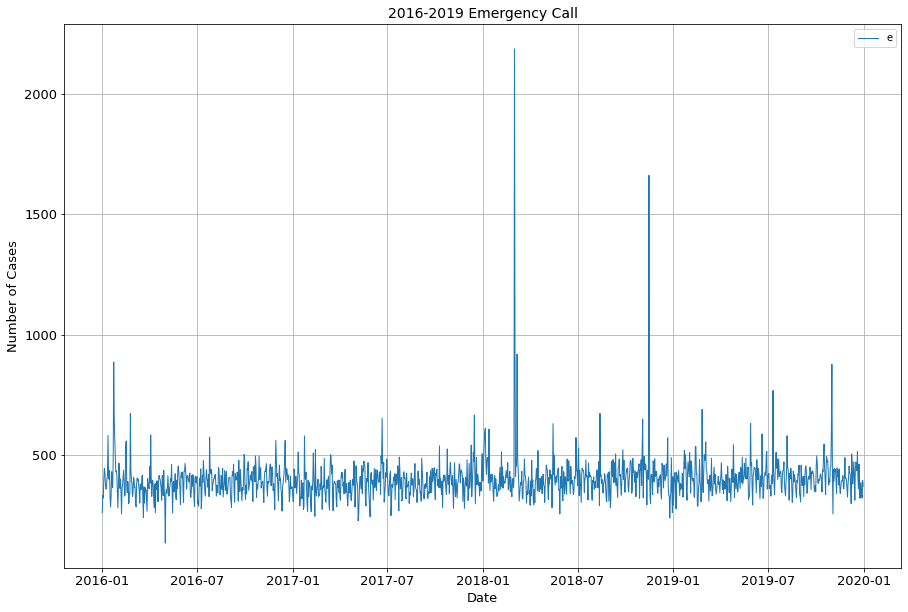

In [16]:
ax = time_series.plot(grid=True, linewidth=1, linestyle='-', figsize=(15,10), fontsize=13)
ax.set_xlabel('Date', fontdict={'fontsize':13})
ax.set_ylabel('Number of Cases', fontdict={'fontsize':13})
ax.set_title('2016-2019 Emergency Call', fontdict={'fontsize':14})
plt.show()

Selama tahun 2018 terdapat peningkatan _emergency call_ yang cukup signifikan sebanyak dua kali dengan jumlah panggilan berturut-turut ialah kurang lebih 2000 dan 1500 panggilan. Adapun jumlah _emergency call_ tiap tahunnya selalu berada di interval 250 hingga 500 panggilan.

### Time Series x General Title

In [17]:
# New dataframe from slicing columns date, general_title, and e
general_title = emergency[['timeStamp', 'general_title', 'e']].copy()
general_title['month_year'] = general_title['timeStamp'].dt.to_period('M')

general_title.drop('timeStamp', axis=1, inplace=True)

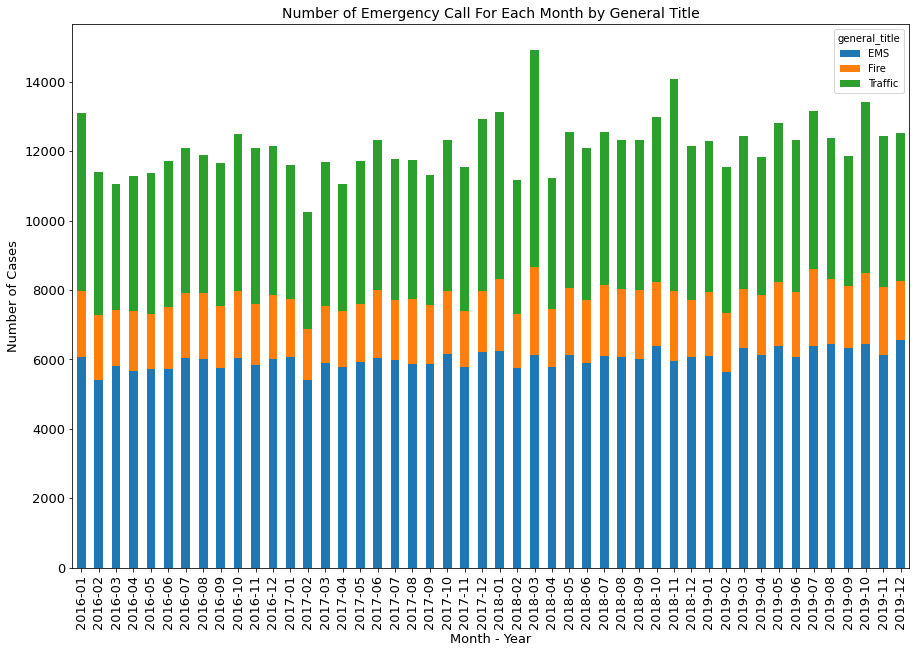

In [18]:
# Pivot table by month_year-general_title with sum method
general_pivot = general_title.pivot_table(index='month_year', columns='general_title',
                                          values='e', aggfunc=np.sum)

# Plot pivot table to stacked bar chart
general_pivot.plot.bar(figsize=(15,10), fontsize=13, stacked=True)
plt.title('Number of Emergency Call For Each Month by General Title', fontsize=14)
plt.xlabel('Month - Year', fontsize=13)
plt.ylabel('Number of Cases', fontsize=13)
plt.show()

Kesimpulan yang kita dapatkan dari stacked bar chart di atas ialah `EMS` atau _Emergency Medical Service_ selalu mendominasi jumlah _emergency call_ di setiap bulan selama periode 2016 hingga 2019. Kuantitas _emergency call_ dari `Fire` di tiap bulannya berada di kisaran 1000 hingga 2000 panggilan dan merupakan jenis panggilan dengan total terendah jika dibandingkan dengan `EMS` dan `Traffic`.

### Detail of Emergency Call

Setelah akhirnya kita mengetahui proporsi dari `general_title` di tiap bulannya selama periode 2016 hingga 2019. Selanjutnya kita akan mencari tahu secara spesifik untuk masing-masing variabel pada `general_title`.

In [19]:
emergency_ems = emergency[emergency['general_title']=='EMS'][['detail_title','e']]

In [20]:
print(f'Terdapat sekitar {emergency_ems.nunique()[0]} jenis atau tipe panggilan dari kategori EMS.')
print(f'Adapun urutan 10 teratas jenis panggilan dari kategori EMS ialah :')
emergency_ems.pivot_table(index='detail_title', aggfunc=np.sum).sort_values(by='e', ascending=False).head(10)

Terdapat sekitar 80 jenis atau tipe panggilan dari kategori EMS.
Adapun urutan 10 teratas jenis panggilan dari kategori EMS ialah :


,e
detail_title,
FALL VICTIM,29764
RESPIRATORY EMERGENCY,29184
CARDIAC EMERGENCY,28303
VEHICLE ACCIDENT,22846
SUBJECT IN PAIN,17116
HEAD INJURY,15839
GENERAL WEAKNESS,10145
SYNCOPAL EPISODE,9566
SEIZURES,9514


In [21]:
emergency_fire = emergency[emergency['general_title']=='Fire'][['detail_title', 'e']]

In [22]:
print(f'Terdapat sekitar {emergency_fire.nunique()[0]} jenis atau tipe panggilan dari kategori Fire.')
print(f'Adapun urutan 10 teratas jenis panggilan dari kategori Fire ialah :')
emergency_fire.pivot_table(index='detail_title', aggfunc=np.sum).sort_values(by='e', ascending=False).head(10)

Terdapat sekitar 58 jenis atau tipe panggilan dari kategori Fire.
Adapun urutan 10 teratas jenis panggilan dari kategori Fire ialah :


,e
detail_title,
FIRE ALARM,33592
VEHICLE ACCIDENT,9646
FIRE INVESTIGATION,8118
GAS-ODOR/LEAK,5893
ELECTRICAL FIRE OUTSIDE,4226
BUILDING FIRE,4156
FIRE SPECIAL SERVICE,3498
CARBON MONOXIDE DETECTOR,3339
VEHICLE FIRE,2854


In [23]:
emergency_traffic = emergency[emergency['general_title']=='Traffic'][['detail_title','e']]

In [24]:
print(f'Terdapat sekitar {emergency_traffic.nunique()[0]} jenis atau tipe panggilan dari kategori Traffic.')
print(f'Adapun urutan dari jenis panggilan kategori Traffic ialah :')
emergency_traffic.pivot_table(index='detail_title', aggfunc=np.sum).sort_values(by='e', ascending=False)

Terdapat sekitar 7 jenis atau tipe panggilan dari kategori Traffic.
Adapun urutan dari jenis panggilan kategori Traffic ialah :


,e
detail_title,
VEHICLE ACCIDENT -,134020
DISABLED VEHICLE -,43440
ROAD OBSTRUCTION -,19946
HAZARDOUS ROAD CONDITIONS -,6212
VEHICLE FIRE -,2978
VEHICLE LEAKING FUEL -,263
DEBRIS/FLUIDS ON HIGHWAY -,184


Meskipun kasus dari kategori `Traffic` berjumlah lebih sedikit dibandingkan dengan dua kategori lainnya. Namun, jumlah kasus terbanyak dari keseluruhan jenis atau tipe di kategori berada pada kategori `Traffic` dengan detail panggilannya ialah `VEHICLE ACCIDENT`.

### Number of Cases per Townships

In [25]:
emergency_twp = emergency[['twp', 'e']].copy()
emergency_twp.rename(columns={'e':'count'}, inplace=True)
top_twp = emergency_twp.pivot_table(index='twp', aggfunc=np.sum).sort_values(by='count', ascending=False).head(10)

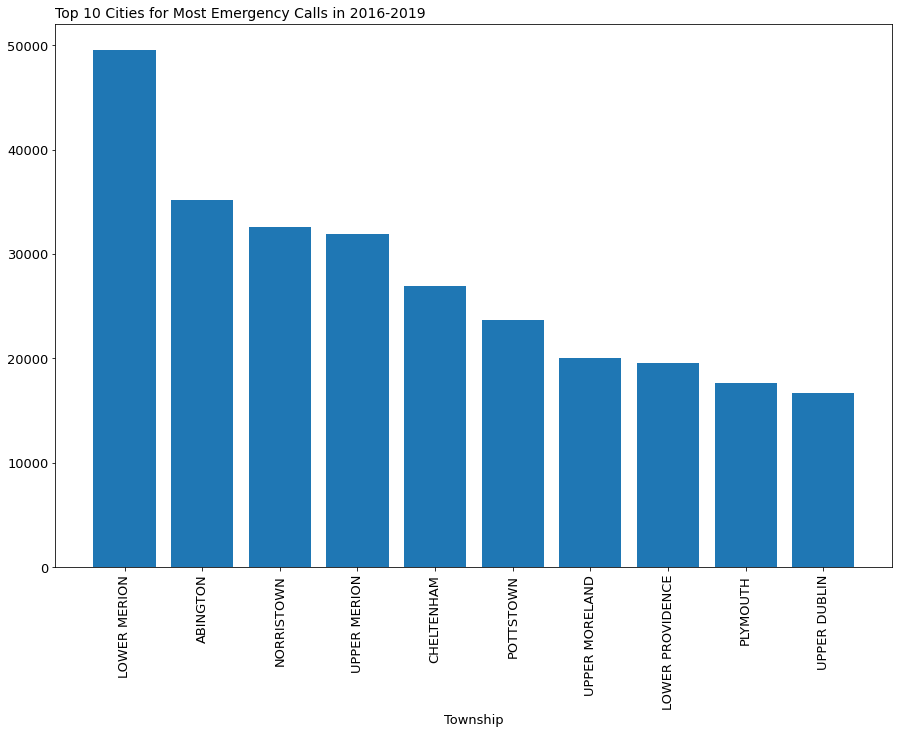

In [26]:
plt.figure(figsize=(15,10))
plt.bar(x=top_twp.index, height=top_twp['count'])
plt.title('Top 10 Cities for Most Emergency Calls in 2016-2019', loc='left', fontdict={'fontsize':14})
plt.xlabel('Township', fontsize=13)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.show()

Sekarang kita coba cari tahu kategori _emergency call_ di masing-masing `twp`.

In [27]:
# New dataframe from slicing top 10 twp by number of cases
list_twp = top_twp.index.values
twp_title = emergency.set_index('twp')
twp_title = twp_title.loc[list_twp][['general_title', 'e']].copy()

# Pivot table by twp-general_title with sum method
twp_title = twp_title.pivot_table(index=twp_title.index, columns='general_title', values='e', aggfunc=np.sum)

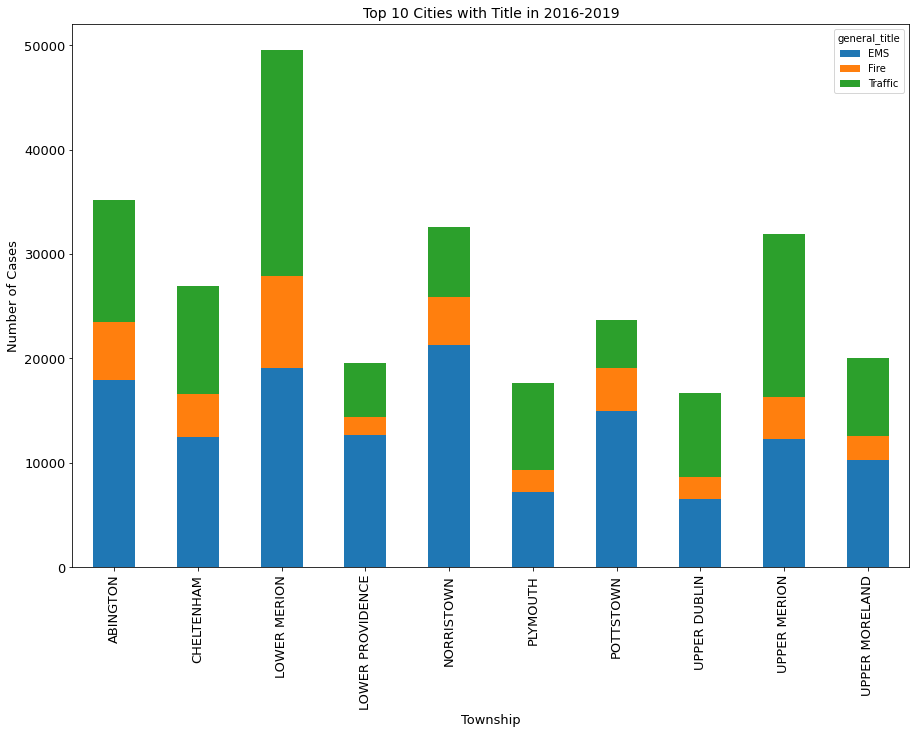

In [28]:
twp_title.plot.bar(figsize=(15,10), fontsize=13, stacked=True, rot=30)
plt.title('Top 10 Cities with Title in 2016-2019', fontsize=14)
plt.xlabel('Township', fontsize=13)
plt.xticks(rotation=90)
plt.ylabel('Number of Cases', fontsize=13)
plt.show()

Dari info yang kita dapatkan sebelumnya, diketahui bahwa kategori `EMS` dan `Traffic` memiliki kontribusi yang besar di tiap bulannya. Setelah kita cek, `LOWER MERION` dan `NORRISTOWN` merupakan kota atau kabupaten yang termasuk tiga besar dengan jumlah _emergency call_ terbanyak. Jika dibandingkan dengan kota atau kabupaten lainnya dari 10 besar tersebut, berturut-turut `LOWER MERION` dan `NORRISTOWN` memiliki jumlah kasus dari kategori `Traffic` dan `EMS` yang lebih banyak.

### Emergency Call by Month and Day

In [29]:
import datetime
import seaborn as sns

In [30]:
emergency_month_date = emergency[['timeStamp', 'e']].copy()

In [31]:
emergency_month_date['month'] = pd.to_datetime(emergency_month_date['timeStamp'].dt.strftime('%B'), format='%B')
emergency_month_date['date'] = emergency_month_date['timeStamp'].dt.strftime('%d')
emergency_month_date.drop('timeStamp', axis=1, inplace=True)

In [32]:
pivot_month_date = emergency_month_date.pivot_table(index='month', columns='date', values='e', aggfunc=np.sum)/4
pivot_month_date.index = pivot_month_date.index.strftime('%B')

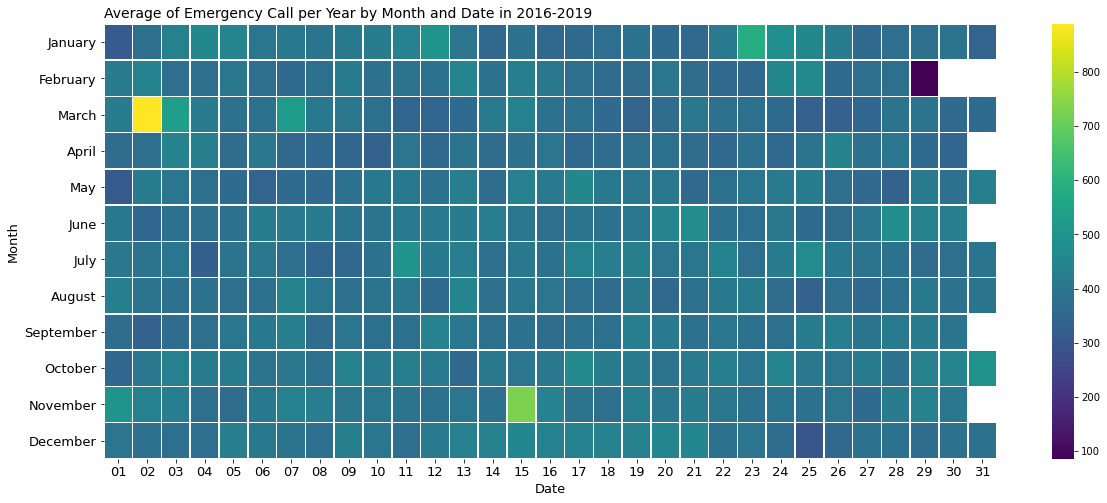

In [33]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(pivot_month_date, cmap='viridis', linewidth=.5)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13)
ax.set_xlabel('Date', fontsize = 13)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 13)
ax.set_ylabel('Month', fontsize = 13)
ax.set_title('Average of Emergency Call per Year by Month and Date in 2016-2019', fontdict={'fontsize':14},
             loc='left')
plt.show()

Secara rataan, hampir di tiap hari dan bulannya memiliki jumlah _emergency call_ yang kurang lebih sama. Hanya saja pada tanggal tertentu seperti `02 March` dan `15 November` terdapat jumlah _emergency call_ yang lebih banyak dibandingkan biasanya.

### Emergency Call by Day and Hour

In [34]:
emergency_date_hour = emergency[['timeStamp', 'e']].copy()

In [35]:
emergency_date_hour['date'] = emergency_date_hour['timeStamp'].dt.strftime('%d')
emergency_date_hour['hour'] = emergency_date_hour['timeStamp'].dt.strftime('%H')
emergency_date_hour.drop('timeStamp', axis=1, inplace=True)

In [36]:
pivot_date_hour = emergency_date_hour.pivot_table(index='hour', columns='date', values='e', aggfunc=np.sum)/4

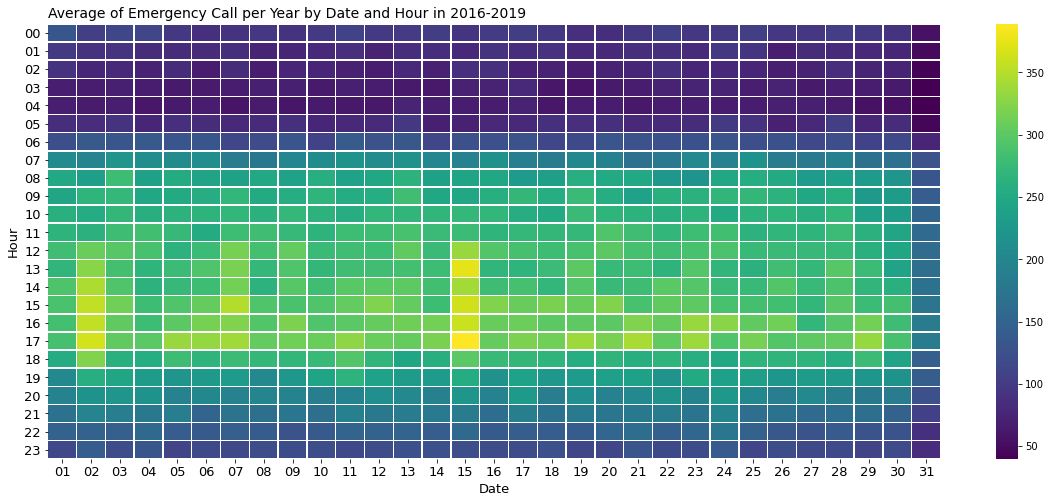

In [37]:
plt.figure(figsize=(20,8))
ax = sns.heatmap(pivot_date_hour, cmap='viridis', linewidth=.5)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 13)
ax.set_xlabel('Date', fontsize = 13)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 13, rotation=0)
ax.set_ylabel('Hour', fontsize = 13)
ax.set_title('Average of Emergency Call per Year by Date and Hour in 2016-2019', fontdict={'fontsize':14},
             loc='left')
plt.show()

Jumlah _emergency call_ paling banyak terjadi di siang hingga sore hari tepatnya sekitar pukul 12.00 hingga 17.00. Hal ini disebabkan oleh karena aktivitas yang lebih banyak terjadi di waktu tersebut.